In [15]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)
num_samples = 10000

skills = ['Web Dev', 'Data Science', 'Graphic Design', 'Writing', 'Mobile Dev']
complexities = ['Low', 'Medium', 'High']
client_histories = ['New', 'Repeat']
urgencies = ['Low', 'Normal', 'High']
locations = ['USA', 'India', 'Europe', 'Other']

data = {
    'Project_ID': range(1, num_samples + 1),
    'Duration_Days': np.random.randint(5, 90, size=num_samples),
    'Skills_Required': np.random.choice(skills, size=num_samples),
    'Complexity': np.random.choice(complexities, size=num_samples),
    'Client_Budget_Min': np.random.randint(100, 5000, size=num_samples),
    'Avg_Past_Bids': np.random.uniform(150, 6000, size=num_samples),
    'Num_Bidders': np.random.randint(2, 50, size=num_samples),
    'Client_History': np.random.choice(client_histories, size=num_samples),
    'Freelancer_Exp_Years': np.random.randint(1, 15, size=num_samples),
    'Freelancer_Success_Rate': np.random.uniform(0.85, 1.0, size=num_samples).round(2),
    'Urgency': np.random.choice(urgencies, size=num_samples),
    'Location': np.random.choice(locations, size=num_samples)
}
df = pd.DataFrame(data)

df['Client_Budget_Max'] = df['Client_Budget_Min'] + np.random.randint(100, 3000, size=num_samples)

base_bid = (df['Client_Budget_Min'] + df['Client_Budget_Max']) / 2
complexity_factor = df['Complexity'].map({'Low': 0.9, 'Medium': 1.1, 'High': 1.4})
experience_factor = 1 + (df['Freelancer_Exp_Years'] / 20)
urgency_factor = df['Urgency'].map({'Low': 0.95, 'Normal': 1.0, 'High': 1.15})
competition_factor = 1 - (df['Num_Bidders'] / 100)

random_noise = np.random.normal(1, 0.1, size=num_samples)

df['Final_Bid'] = base_bid * complexity_factor * experience_factor * urgency_factor * competition_factor * random_noise
df['Final_Bid'] = df['Final_Bid'].round(2)

df.to_csv('freelance_bids_dataset_10000.csv', index=False)

print("Dataset generated and saved as 'freelance_bids_dataset_10000.csv'")
print("First 5 rows of the dataset:")
df.head()

Dataset generated and saved as 'freelance_bids_dataset_10000.csv'
First 5 rows of the dataset:


,Project_ID,Duration_Days,Skills_Required,Complexity,Client_Budget_Min,Avg_Past_Bids,Num_Bidders,Client_History,Freelancer_Exp_Years,Freelancer_Success_Rate,Urgency,Location,Client_Budget_Max,Final_Bid
0,1,56,Writing,Low,3494,1237.514137,28,New,7,0.86,Low,Europe,4083,3098.59
1,2,19,Data Science,High,4125,3685.079478,12,Repeat,11,0.96,Low,Other,5248,9119.58
2,3,76,Writing,High,3679,5241.289885,37,Repeat,8,0.88,Low,India,6023,5756.90
3,4,65,Web Dev,Low,2903,2674.468820,11,Repeat,3,0.89,High,USA,3129,3205.08
4,5,25,Data Science,High,2330,2997.324045,17,Repeat,1,0.94,High,Europe,4303,4510.13


# EDA

In [16]:

df = pd.read_csv('freelance_bids_dataset_10000.csv')

# Display basic information
print("Dataset Info:")
df.info()

print("\n\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project_ID               10000 non-null  int64  
 1   Duration_Days            10000 non-null  int64  
 2   Skills_Required          10000 non-null  object 
 3   Complexity               10000 non-null  object 
 4   Client_Budget_Min        10000 non-null  int64  
 5   Avg_Past_Bids            10000 non-null  float64
 6   Num_Bidders              10000 non-null  int64  
 7   Client_History           10000 non-null  object 
 8   Freelancer_Exp_Years     10000 non-null  int64  
 9   Freelancer_Success_Rate  10000 non-null  float64
 10  Urgency                  10000 non-null  object 
 11  Location                 10000 non-null  object 
 12  Client_Budget_Max        10000 non-null  int64  
 13  Final_Bid                10000 non-null  float64
dtypes: float6

,Project_ID,Duration_Days,Client_Budget_Min,Avg_Past_Bids,Num_Bidders,Freelancer_Exp_Years,Freelancer_Success_Rate,Client_Budget_Max,Final_Bid
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,46.91840,2572.029500,3053.889709,25.395000,7.535000,0.925367,4117.926200,4017.243714
std,2886.89568,24.42235,1407.013044,1687.114963,13.864711,4.025046,0.043699,1637.151339,2287.686282
min,1.00000,5.00000,100.000000,150.598879,2.000000,1.000000,0.850000,218.000000,129.540000
25%,2500.75000,26.00000,1368.000000,1608.742133,13.000000,4.000000,0.890000,2881.000000,2263.590000
50%,5000.50000,47.00000,2590.500000,3050.787749,25.000000,8.000000,0.920000,4121.000000,3644.405000
75%,7500.25000,68.00000,3780.000000,4509.844423,37.000000,11.000000,0.960000,5348.000000,5354.467500
max,10000.00000,89.00000,4997.000000,5999.413153,49.000000,14.000000,1.000000,7888.000000,15929.950000


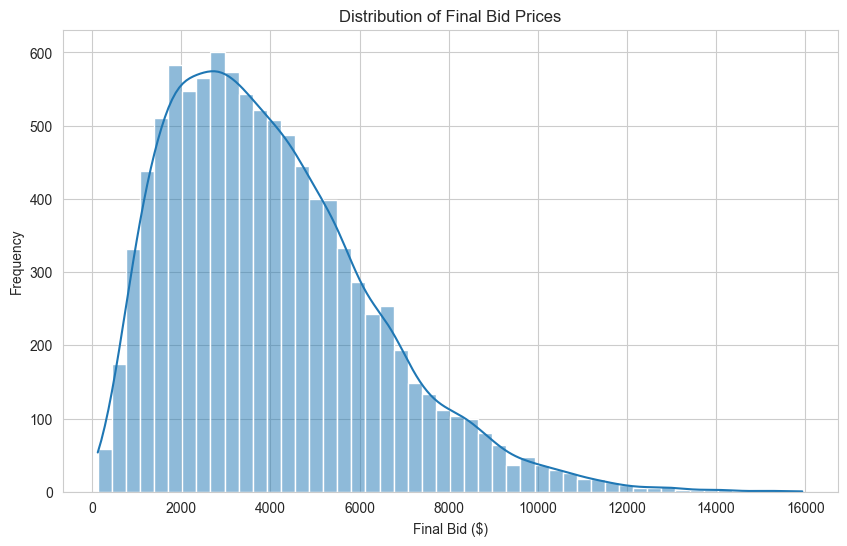

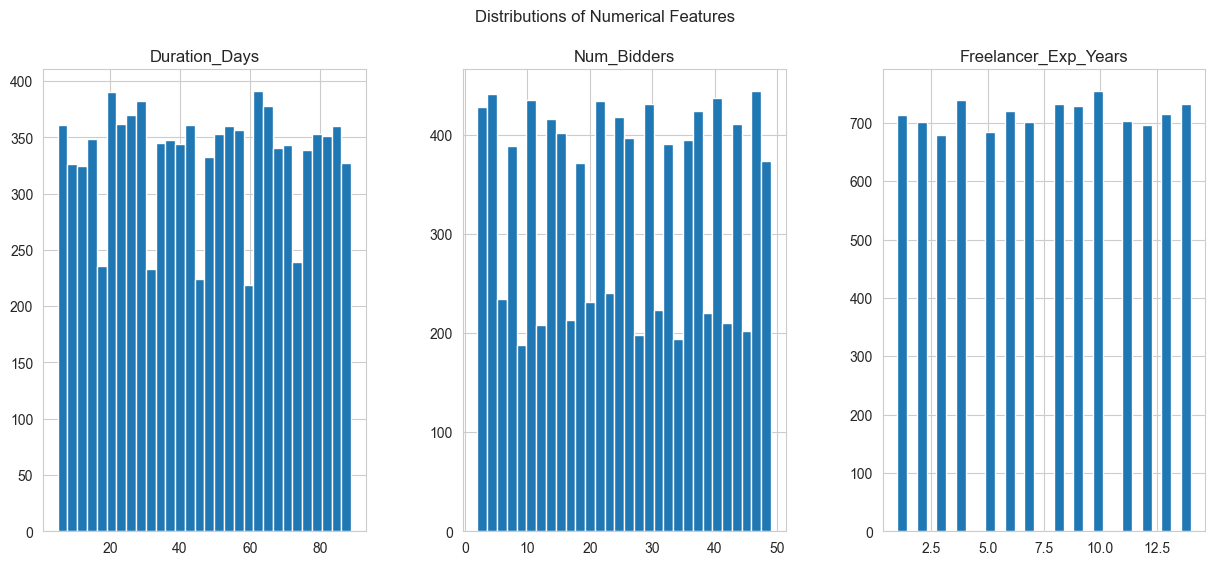

In [17]:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Final_Bid'], kde=True, bins=50)
plt.title('Distribution of Final Bid Prices')
plt.xlabel('Final Bid ($)')
plt.ylabel('Frequency')
plt.show()

numerical_features = ['Duration_Days', 'Num_Bidders', 'Freelancer_Exp_Years']
df[numerical_features].hist(bins=30, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Distributions of Numerical Features')
plt.show()

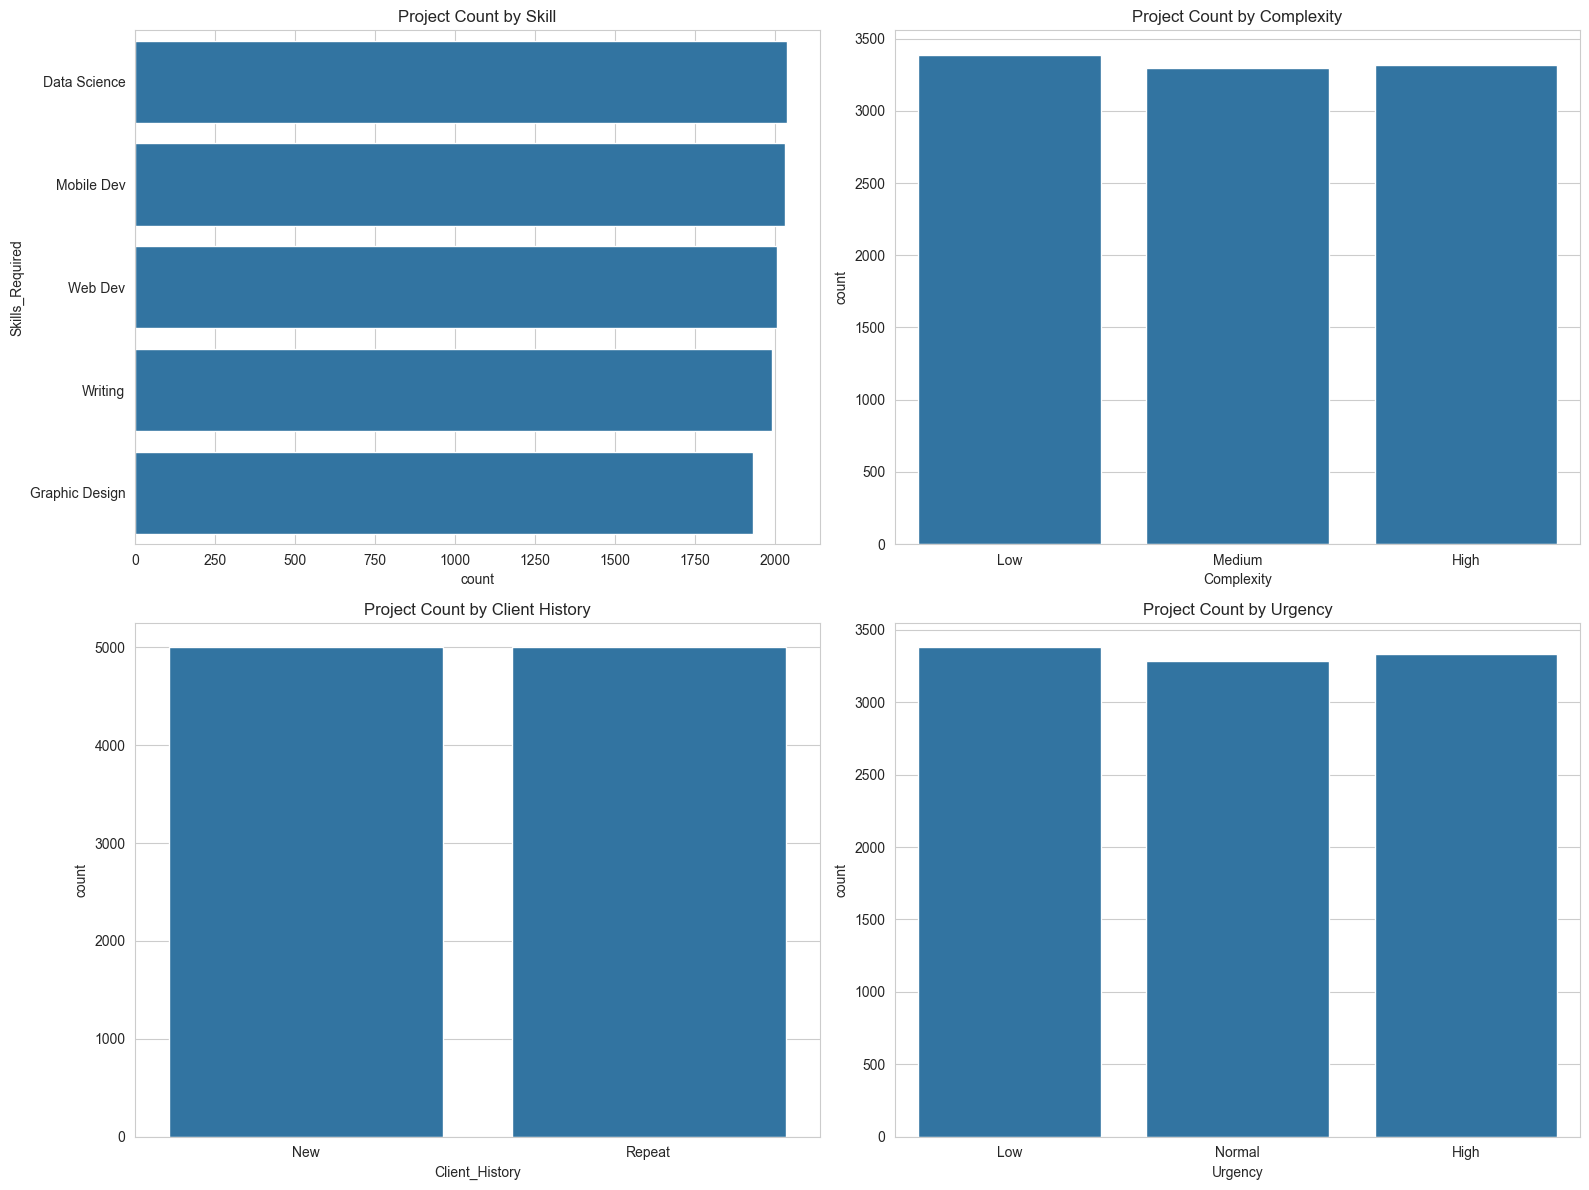

In [18]:

categorical_features = ['Skills_Required', 'Complexity', 'Client_History', 'Urgency']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(ax=axes[0, 0], y=df['Skills_Required'], order=df['Skills_Required'].value_counts().index)
axes[0, 0].set_title('Project Count by Skill')
sns.countplot(ax=axes[0, 1], x=df['Complexity'], order=['Low', 'Medium', 'High'])
axes[0, 1].set_title('Project Count by Complexity')
sns.countplot(ax=axes[1, 0], x=df['Client_History'])
axes[1, 0].set_title('Project Count by Client History')
sns.countplot(ax=axes[1, 1], x=df['Urgency'], order=['Low', 'Normal', 'High'])
axes[1, 1].set_title('Project Count by Urgency')
plt.tight_layout()
plt.show()

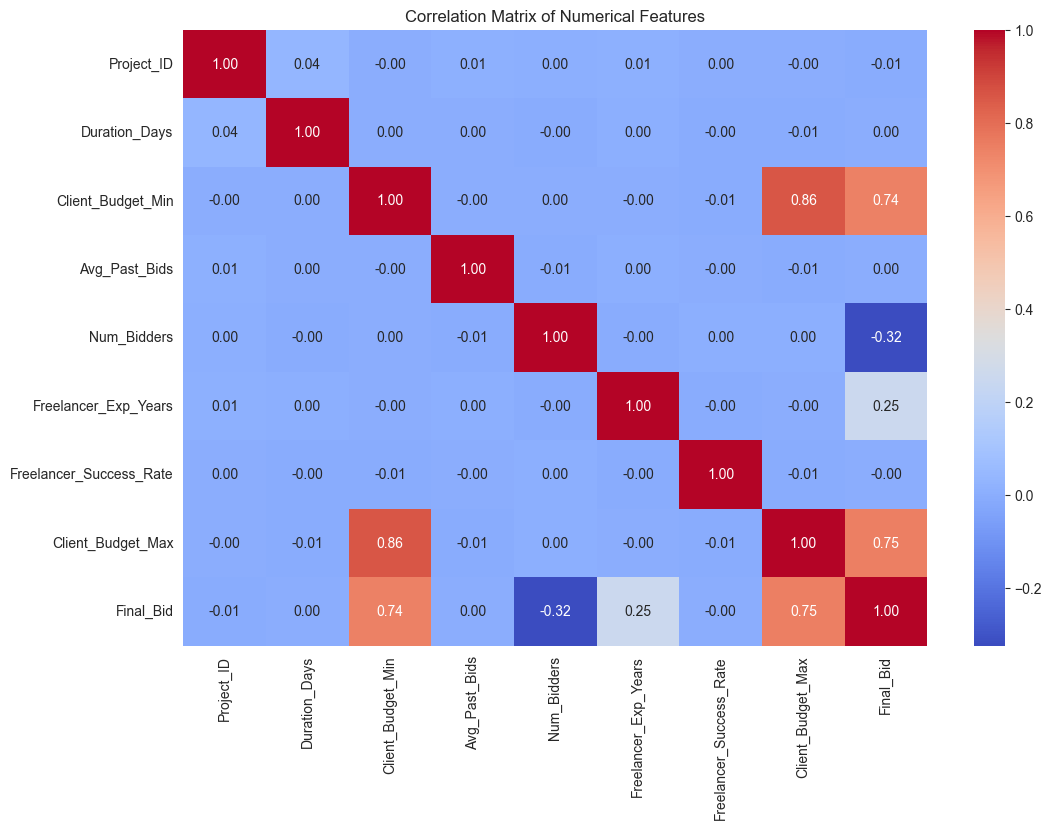

In [20]:
# Calculate the correlation matrix for numerical features
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#  Preprocess Data

In [21]:

df = df.drop('Project_ID', axis=1)

X = df.drop('Final_Bid', axis=1)
y = df['Final_Bid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (8000, 12)
Testing set shape: (2000, 12)


# Create Preprocessing Pipeline

In [22]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
ordinal_features = ['Complexity', 'Urgency']
nominal_features = X.select_dtypes(include=['object']).drop(['Complexity', 'Urgency'], axis=1).columns.tolist()

complexity_order = ['Low', 'Medium', 'High']
urgency_order = ['Low', 'Normal', 'High']

numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder(categories=[complexity_order, urgency_order])
nominal_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough' 
)

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


# Train the Model

In [23]:

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)) 
])

print("Training the RandomForestRegressor model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete!")

import joblib
import os

# Ensure models folder exists
os.makedirs("models", exist_ok=True)

# Save the full pipeline
joblib.dump(model_pipeline, "models/model_pipeline.pkl")
print("Pipeline saved successfully!")


Training the RandomForestRegressor model...
Model training complete!
Pipeline saved successfully!


--- Model Evaluation Results ---
Mean Absolute Error (MAE): $394.31
Root Mean Squared Error (RMSE): $557.56
R-squared (R²) Score: 0.9395


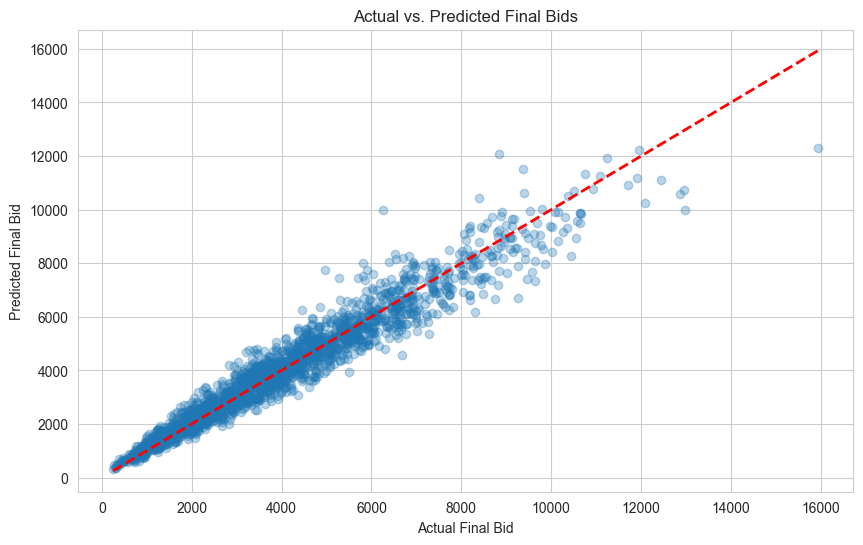

In [24]:

y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Final Bid')
plt.ylabel('Predicted Final Bid')
plt.title('Actual vs. Predicted Final Bids')
plt.show()

# Hyperparameter Tuning

In [25]:

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=3, 
    n_jobs=-1, 
    scoring='r2',
    verbose=2
)

print("Starting Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best parameters found:
{'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}


# Test & Validate

In [26]:

y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("--- Tuned Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned:.2f}")
print(f"R-squared (R²) Score: {r2_tuned:.4f}")

print("\n--- Performance Comparison ---")
print(f"Original R²: {r2:.4f}  |  Tuned R²: {r2_tuned:.4f}")
print(f"Original MAE: ${mae:.2f} |  Tuned MAE: ${mae_tuned:.2f}")

--- Tuned Model Evaluation Results ---
Mean Absolute Error (MAE): $391.45
Root Mean Squared Error (RMSE): $554.57
R-squared (R²) Score: 0.9401

--- Performance Comparison ---
Original R²: 0.9395  |  Tuned R²: 0.9401
Original MAE: $394.31 |  Tuned MAE: $391.45


# Predict on New Data

In [30]:

new_project_data = pd.DataFrame({
    'Duration_Days': [30],
    'Skills_Required': ['machine learning'],
    'Complexity': ['High'],
    'Client_Budget_Min': [5],
    'Client_Budget_Max': [450],
    'Avg_Past_Bids': [31],
    'Num_Bidders': [105],
    'Client_History': ['New'],
    'Freelancer_Exp_Years': [8],
    'Freelancer_Success_Rate': [0.97],
    'Urgency': ['High'],
    'Location': ['USA']
})
predicted_bid = best_model.predict(new_project_data)

print(f"The suggested optimal bid for the new project is: ${predicted_bid[0]:.2f}")

The suggested optimal bid for the new project is: $480.92
